<a href="https://colab.research.google.com/github/khadijakatanani/Data-Science/blob/main/Week_11_CNN_Training_Validating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#########################################################################
# Convolutional Neural Network - Fruit Classification
#########################################################################


## Business Problem

  The ABC Grocery team representative mentioned that they had built a prototype for a robotic sorting arm that could be used to pick and move products off the platform. It would use a camera to "see" the product, and could be programmed to move that particular product into a designated bin, for further processing. This would be a huge win for them in terms speeding up sorting, and thus reducing costs.

  The only thing they have not figured out was how to actually identify each product using the camera, so that the robotic arm could move it to the right place.

  Note: this is a multiclass classification problem. Why?

### **Provided Datasets**

Images for the following types of fruit:

* apple
* avocado
* banana
* kiwi
* lemon
* orange

1. The training dataset has 60 images for each fruit type, adding up to 360.
2. The validation dataset has 30 images for each fruit type, adding up to 180.
3. The test dataset has 10 images for each fruit type, adding up to 60.

## Import required packages

Additional Information on the libraries and classes:

* Conv2D: for convolutional layers
* MaxPooling2D: for pooling layers, type max pooling
* Flatten: for turning the feature maps into a big one dimensional stack before heading into the dense layers
* Dense: for fully connected layer(s)
* ImageDataGenerator: for bringing images for training preprocessing
* ModelCheckpoint: for saving the best model during training

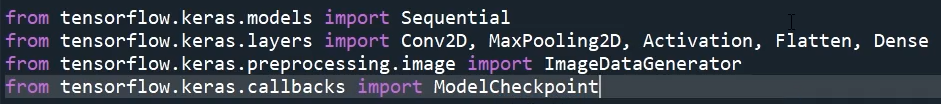

## Set Up Flow For Training & Validation Data

### data flow parameters

  Necessary for a huge volume of images as we can't necessarily hold all images in memory at once.
  
  We want to pass them into the model a few at a time. We will pass them in mini-badges. 32 is a common value for batch size.

  **num_channels** represents the color scale. 3 for RGB: red, green, blue.

  If the image was grayscale, the num_channels would be 1.

  **num_classes** is the number of types of fruit.

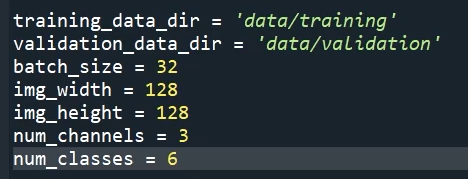

### image generators

  to rescale the pixel data as images flow in.
  
  It is like standardising data to exist on the same scale.
  
  Bringing the features learned in the depth of the network to similar magnitude.
  
  Shortly: training is faster as gradient descent can converge faster each time

* Each color channel (R, G, and B) has a range from 0 to 255

  **rescale** = 1./255:  
  rescaling the pixels, normalizing RGB values to the range 0.0 to 1.0

  https://chatgpt.com/share/676dd7d7-e9b4-8013-a190-54b21f174bb2

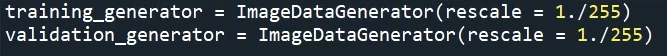

### image flows

logic to send mini batches of images from the hard drive to the network

**target_size:**  (width, height), to resize all images that flow through, they will be dealt within the exact same way by the network

**class_mode**: categorical (this is a multiclass classification problem). If it was a binary classification problem, the value would be "binary"

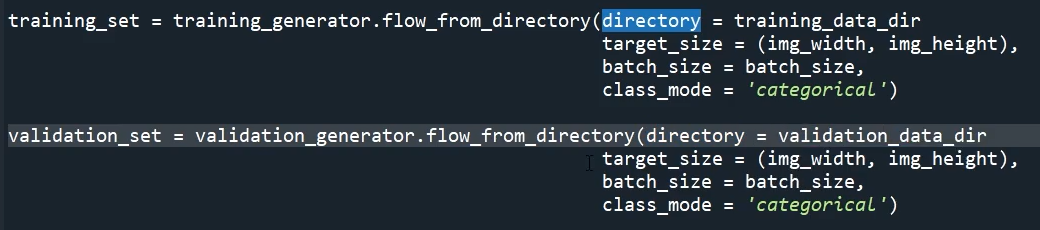

## Network Architecture

### network architecture

**Conv2D**: to convolve each RGB layer over 2 dimensions

(each of the RGB layers of our input image is done in a grid we move across and we move down as we scan,
Conv1D: used language-based tasks,
Conv3D: used for video-based tasks where time is an extra dimension)

**filters**= 32, the number of feature maps

**kernel_size**= (3,3), this is the filter size, 3 pixels by 3 pixels

**padding** = "same", helps when running out of pixels

**Note**: first convolutional layer with 32 filters receives information directly from the normalized pixels within the image

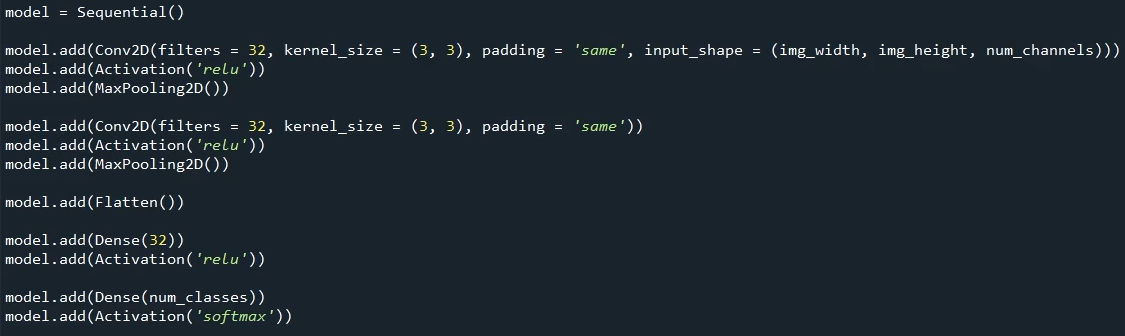

### compile network

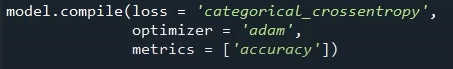

### view network architecture

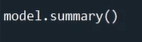

## Train The Network!

### training parameters

**num_epochs**: 50, to run all of the data through in batch form 50 times

**model_filename**: "... .h5", to save the model architecture and the values for the network parameter, adjust based on where you want to save it

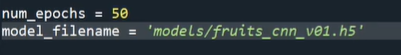

### callbacks

  to save the best model at the end of the 50th epoch

  **monitor**: which metric to track to assess performance
  
  **verbose**: to be notified in the console if and when the best model is found

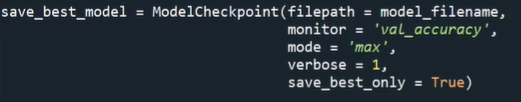

### train the network

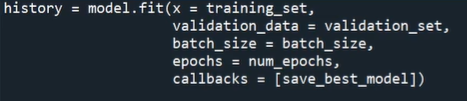

## Visualise Training & Validation Performance

In [ ]:
import matplotlib.pyplot as plt

# plot validation results
fig, ax = plt.subplots(2, 1, figsize=(15,15))
ax[0].set_title('Loss')
ax[0].plot(history.epoch, history.history["loss"], label="Training Loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(history.epoch, history.history["accuracy"], label="Training Accuracy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()
plt.show()

# get best epoch performance for validation accuracy
max(history.history['val_accuracy'])

You need to have similar graphs

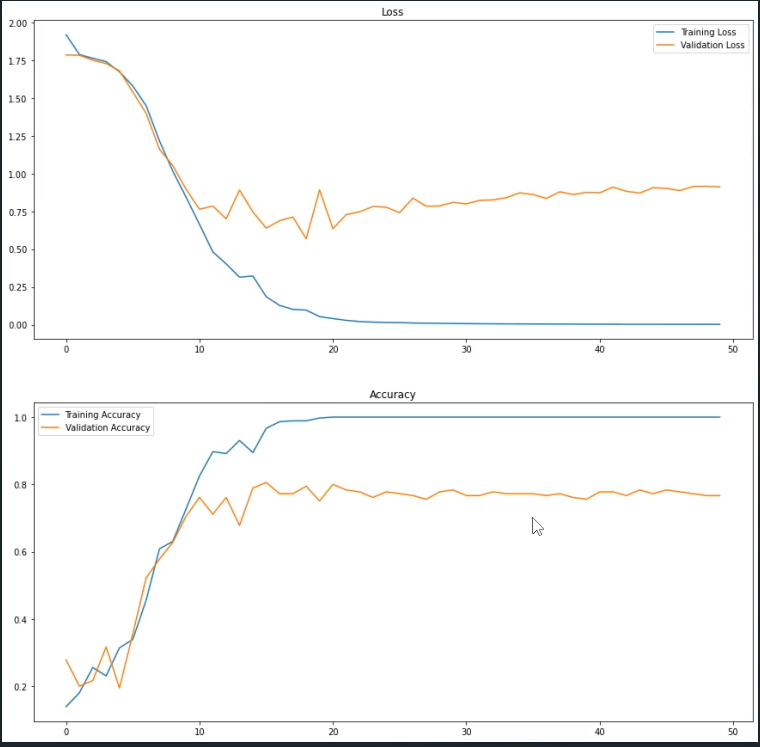

Ref: Data Science Infinity